# A Look on bce vs. mse

In [2]:
import numpy as np
import matplotlib.pyplot as plt


In [3]:
epsilon = 0.05 # minimum threshold for y, to avoid DivideByZero
y_true = np.linspace(epsilon,1-epsilon,100)
y_pred = np.linspace(epsilon,1-epsilon,100)

y_pred_grid, y_true_grid = np.meshgrid(y_pred, y_true)

def bce(y_true, y_pred):
    minus_bce = y_true*np.log(y_pred) + (1-y_true)*np.log(1-y_pred)
    return -minus_bce

def mse(y_true, y_pred):
    return np.square(y_true-y_pred)

z_bce_grid = bce(y_true_grid, y_pred_grid)
z_mse_grid = mse(y_true_grid, y_pred_grid)

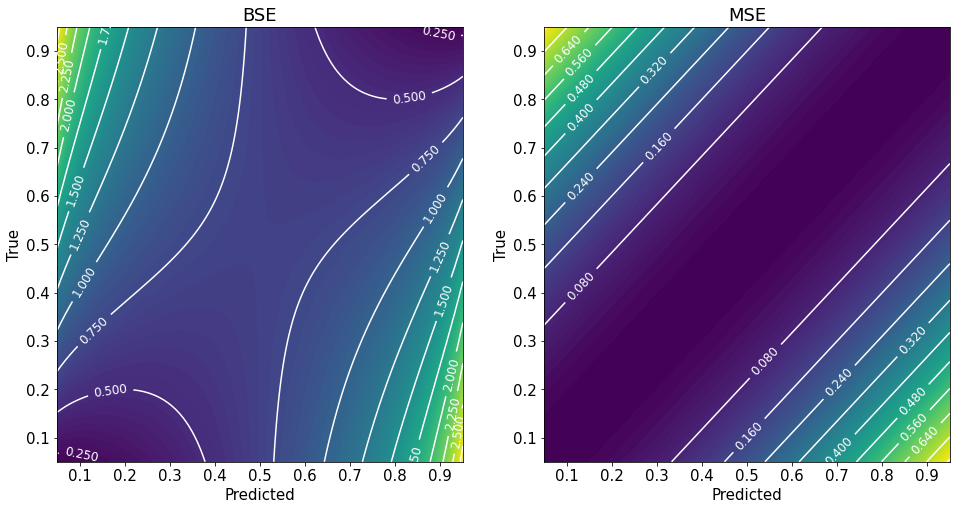

In [12]:
fig, axs = plt.subplots(1,2)

fig.set_figwidth(16)
fig.set_figheight(8)

axs[0].contourf(y_pred_grid, y_true_grid, z_bce_grid, 
    levels=100,
    cmap='viridis')
bce_contour = axs[0].contour(y_pred_grid, y_true_grid, z_bce_grid, 
    levels=10,
    colors='white')
axs[1].contourf(y_pred_grid, y_true_grid, z_mse_grid,
    levels=100,
    cmap='viridis')
mse_contour = axs[1].contour(y_pred_grid, y_true_grid, z_mse_grid,
    levels=10,
    colors='white')

axs[0].clabel(bce_contour, 
    inline=True, 
    fontsize=12,
    colors='white')

axs[1].clabel(mse_contour, 
    inline=True, 
    fontsize=12,
    colors='white')

axs[0].tick_params(labelsize=15)
axs[1].tick_params(labelsize=15)

axs[0].set_title('BSE', fontsize=18)
axs[1].set_title('MSE', fontsize=18)

for ax in axs.flat:
    ax.set_xlabel('Predicted', fontsize=15)
    ax.set_ylabel('True', fontsize=15)

plt.show()
fig.savefig('images/auxiliary/bse_mse.png', dpi=160)